In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import stored data
df_data = pd.read_csv('exiobase_lica_scores.csv')
df_data = df_data.rename(columns={'Unnamed: 0':'activity'})
df_data = df_data.set_index('activity')
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
activity,,,,,,,,,,,,,,,,,,,,
3134,0.0,0.0,11201.326492,12883.777118,255829.178178,1757.368486,8.888608,0.0,456042.371358,7.124922,0.0,1783.370208,12.994451,21048.056235,2.222093e+07,0.0,3617.065065,347.679984,29.461488,564.839510
5011,0.0,0.0,141.389312,5.093702,599.315514,1.248135,0.006260,0.0,328.709211,0.004594,0.0,2.336660,0.014760,112.249001,2.355901e+04,0.0,4.561716,0.398248,0.010772,0.168818
2309,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
1754,0.0,0.0,268.072880,37.382050,6428.640210,7.854999,0.070190,0.0,3121.043304,0.881202,0.0,19.762819,0.041784,94.142458,1.339083e+05,0.0,64.562019,4.765737,0.167417,2.421799
7229,0.0,0.0,-38.662620,0.483713,1738.408632,0.327966,0.031941,0.0,698.350954,0.005954,0.0,8.437970,0.001601,8.777430,1.689036e+04,0.0,13.617743,3.321126,-0.001926,-3.406599


In [4]:
# change the columns from str to int, better for visualization
col_dict = {}
for i in range(len(df_data.columns)):
    col_dict[df_data.columns[i]]=i
df_data = df_data.rename(columns = col_dict)

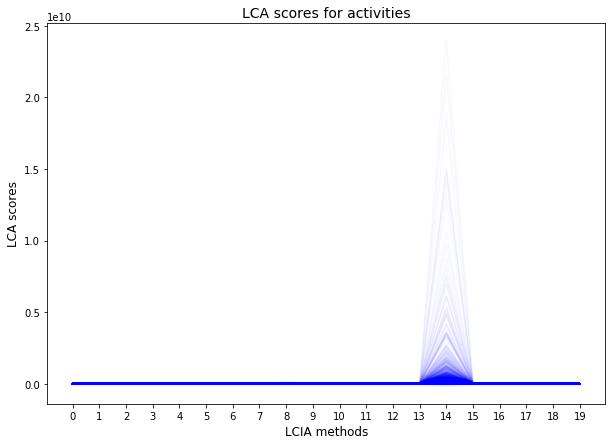

In [10]:
# original graph for all activities
df_data.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)
plt.title('LCA scores for activities',fontsize = 14)
plt.ylabel('LCA scores',fontsize = 12)
plt.xlabel('LCIA methods',fontsize = 12)
plt.xticks(np.arange(0,20,1))
plt.show()

In [11]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler()
x = df_data.values.copy()
X = sc.fit_transform(x)
df_scaled = df_data.copy()
for i in range(X.shape[1]):
    df_scaled[i]=X.T[i]
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
activity,,,,,,,,,,,,,,,,,,,,
3134,0.0,0.0,0.169800,0.006024,0.066139,0.010053,0.290174,0.0,0.292231,0.084435,0.0,0.146846,0.008816,0.012410,0.009095,0.0,0.148085,0.158721,0.002685,0.003092
5011,0.0,0.0,0.168298,0.003630,0.062730,0.008399,0.287542,0.0,0.289715,0.065654,0.0,0.143356,0.008025,0.011451,0.008176,0.0,0.144379,0.155115,0.002322,0.002264
2309,0.0,0.0,0.168279,0.003630,0.062722,0.008398,0.287540,0.0,0.289713,0.065642,0.0,0.143352,0.008024,0.011446,0.008175,0.0,0.144375,0.155111,0.002322,0.002263
1754,0.0,0.0,0.168315,0.003636,0.062808,0.008405,0.287561,0.0,0.289730,0.067967,0.0,0.143391,0.008027,0.011450,0.008181,0.0,0.144441,0.155161,0.002324,0.002267
7229,0.0,0.0,0.168274,0.003630,0.062745,0.008398,0.287549,0.0,0.289717,0.065658,0.0,0.143368,0.008024,0.011446,0.008176,0.0,0.144389,0.155146,0.002322,0.002258


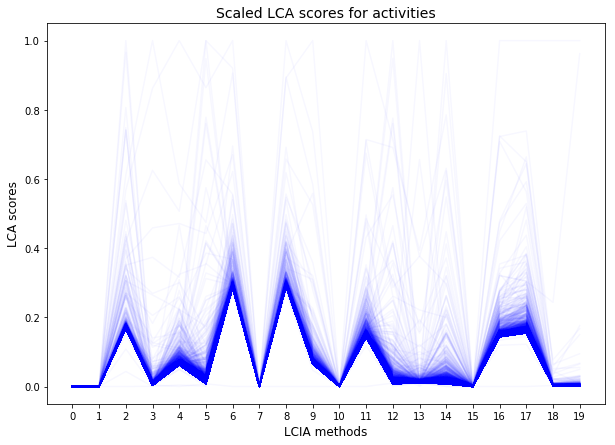

In [14]:
# scaled features for all activities
df_scaled.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)
plt.title('Scaled LCA scores for activities',fontsize = 14)
plt.ylabel('LCA scores',fontsize = 12)
plt.xlabel('LCIA methods',fontsize = 12)
plt.xticks(np.arange(0,20,1))
plt.show()

In [15]:
# drop the zero columns if there is
drop_list = []
data = df_scaled.values.copy()
for i in range(data.shape[1]):
    if df_scaled[i].sum() == 0 and max(df_scaled[i]) == 0 and min(df_scaled[i]) == 0:
        drop_list.append(i)
len(drop_list)

5

In [16]:
df_drop_zero = df_scaled.copy()
df_drop_zero = df_drop_zero.drop(columns = drop_list) # drop one column from high correlated pairs 
df_drop_zero.head()

,2,3,4,5,6,8,9,11,12,13,14,16,17,18,19
activity,,,,,,,,,,,,,,,
3134,0.169800,0.006024,0.066139,0.010053,0.290174,0.292231,0.084435,0.146846,0.008816,0.012410,0.009095,0.148085,0.158721,0.002685,0.003092
5011,0.168298,0.003630,0.062730,0.008399,0.287542,0.289715,0.065654,0.143356,0.008025,0.011451,0.008176,0.144379,0.155115,0.002322,0.002264
2309,0.168279,0.003630,0.062722,0.008398,0.287540,0.289713,0.065642,0.143352,0.008024,0.011446,0.008175,0.144375,0.155111,0.002322,0.002263
1754,0.168315,0.003636,0.062808,0.008405,0.287561,0.289730,0.067967,0.143391,0.008027,0.011450,0.008181,0.144441,0.155161,0.002324,0.002267
7229,0.168274,0.003630,0.062745,0.008398,0.287549,0.289717,0.065658,0.143368,0.008024,0.011446,0.008176,0.144389,0.155146,0.002322,0.002258


In [17]:
df_drop_zero.corr()

,2,3,4,5,6,8,9,11,12,13,14,16,17,18,19
2,1.000000,0.378750,0.477654,0.219671,0.377981,0.377967,0.423492,0.409014,0.175116,0.241847,0.193057,0.411843,0.369396,0.233915,0.228792
3,0.378750,1.000000,0.784661,0.522957,0.798531,0.795593,0.793325,0.795980,0.405840,0.555002,0.435296,0.811595,0.645041,0.601892,0.569003
4,0.477654,0.784661,1.000000,0.514472,0.817358,0.817832,0.829061,0.900805,0.425930,0.498060,0.446570,0.903037,0.827110,0.641751,0.589573
5,0.219671,0.522957,0.514472,1.000000,0.487230,0.474859,0.547936,0.592478,0.988272,0.337533,0.958751,0.566534,0.702289,0.351017,0.320667
6,0.377981,0.798531,0.817358,0.487230,1.000000,0.999508,0.831929,0.911903,0.380096,0.469435,0.409550,0.919588,0.809686,0.510867,0.486120
8,0.377967,0.795593,0.817832,0.474859,0.999508,1.000000,0.826457,0.910041,0.368334,0.466030,0.397659,0.918171,0.805182,0.516241,0.488805
9,0.423492,0.793325,0.829061,0.547936,0.831929,0.826457,1.000000,0.890642,0.439228,0.533233,0.479589,0.894655,0.819843,0.480269,0.459787
11,0.409014,0.795980,0.900805,0.592478,0.911903,0.910041,0.890642,1.000000,0.497938,0.501305,0.522930,0.998097,0.945640,0.572610,0.532064
12,0.175116,0.405840,0.425930,0.988272,0.380096,0.368334,0.439228,0.497938,1.000000,0.270739,0.959975,0.466855,0.641801,0.307287,0.270536
13,0.241847,0.555002,0.498060,0.337533,0.469435,0.466030,0.533233,0.501305,0.270739,1.000000,0.297750,0.509184,0.417634,0.406902,0.565606


In [18]:
# correlation analysis and drop one of the highly correlated paired columns
corr_mtx = df_drop_zero.corr()
corrmtx = corr_mtx.values.copy()
corr_i = []
corr_j = []
for i in range(corr_mtx.shape[0]):
    for j in range(corr_mtx.shape[1]):
        if corrmtx[i,j] > 0.99 and i != j:
            print (df_drop_zero.columns[i],'-',df_drop_zero.columns[j])
            corr_i.append(df_drop_zero.columns[i])
            corr_j.append(df_drop_zero.columns[j])

6 - 8
8 - 6
11 - 16
16 - 11


In [19]:
drop_list = []
for i in range(len(corr_i)):
    if corr_j[i] not in drop_list and corr_i[i] not in drop_list:
        drop_list.append(corr_j[i])
len(drop_list)

2

In [20]:
drop_list

[8, 16]

In [21]:
df_drop_corr = df_drop_zero.copy()
df_drop_corr = df_drop_corr.drop(columns = drop_list) # drop one column from high correlated pairs 
df_drop_corr.head()

,2,3,4,5,6,9,11,12,13,14,17,18,19
activity,,,,,,,,,,,,,
3134,0.169800,0.006024,0.066139,0.010053,0.290174,0.084435,0.146846,0.008816,0.012410,0.009095,0.158721,0.002685,0.003092
5011,0.168298,0.003630,0.062730,0.008399,0.287542,0.065654,0.143356,0.008025,0.011451,0.008176,0.155115,0.002322,0.002264
2309,0.168279,0.003630,0.062722,0.008398,0.287540,0.065642,0.143352,0.008024,0.011446,0.008175,0.155111,0.002322,0.002263
1754,0.168315,0.003636,0.062808,0.008405,0.287561,0.067967,0.143391,0.008027,0.011450,0.008181,0.155161,0.002324,0.002267
7229,0.168274,0.003630,0.062745,0.008398,0.287549,0.065658,0.143368,0.008024,0.011446,0.008176,0.155146,0.002322,0.002258


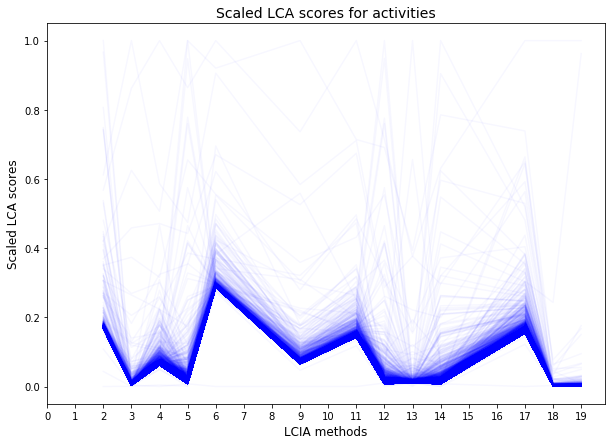

In [22]:
# droped correlated features for all activities, quite similar
df_drop_corr.T.plot(figsize = (10,7), legend = False, 
                    color = 'blue', alpha = 0.03)
plt.title('Scaled LCA scores for activities',fontsize = 14)
plt.ylabel('Scaled LCA scores',fontsize = 12)
plt.xlabel('LCIA methods',fontsize = 12)
plt.xticks(np.arange(0,20,1))
plt.show()

In [23]:
# clustering by DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [24]:
X_dbscan = df_drop_corr.values.copy()

db = DBSCAN(eps = 0.05, min_samples = 5).fit(X_dbscan) # eps and min_samples are important parameters for clusters, 
                                                       # higher min_samples and lower eps indicate higher density
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# performance indexes for clustering
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_dbscan, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_dbscan, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_dbscan, labels))

Estimated number of clusters: 1
Estimated number of noise points: 93
Silhouette Coefficient: 0.954
Calinski harabasz score: 2374.879
Davies bouldin score: 1.329


In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
X_agglo_ward = df_drop_corr.values.copy()
# distance_threshold is the parameter to distinguish samples for different clusters
clustering = AgglomerativeClustering(linkage='ward', distance_threshold = 1,compute_full_tree =True, n_clusters = None)
clustering.fit(X_agglo_ward)
labels = clustering.labels_
n_clusters = max(labels)+1
print (n_clusters,'clusetrs')
print (list(labels).count(-1),'outliers')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_agglo_ward, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_agglo_ward, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_agglo_ward, labels))

15 clusetrs
0 outliers
Silhouette Coefficient: 0.789
Calinski harabasz score: 4759.607
Davies bouldin score: 0.704


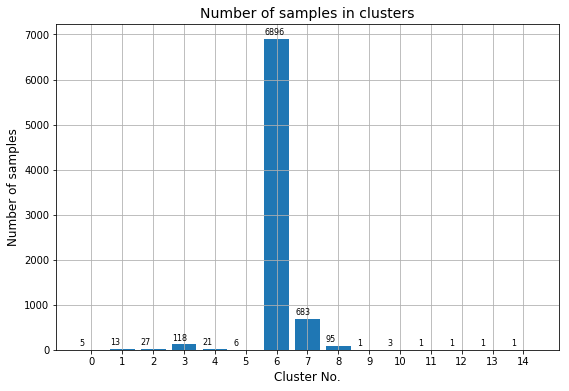

In [27]:
# get the distribution of samples in each cluster
x = [i for i in range(n_clusters)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.bar(x,y)
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
plt.xticks(np.arange(0, n_clusters, 1))
for i in x:
    plt.text(i-0.4,y[i]+100,str(y[i]),fontsize = 8)
plt.grid(True)
plt.show()
# 1 cluster with most samples (6741 out of 7872), no outliers,
# many clusters with a few samples (less than 20), 13 clusters only have 1 sample
# which is not reasonable

In [28]:
from sklearn.cluster import OPTICS

In [29]:
X_optics = df_drop_corr.values.copy()
optics = OPTICS(min_samples=20,
                xi=0.05,
                min_cluster_size=5)
optics.fit(X_optics)
labels = optics.labels_
print (max(labels)+1,'clusetrs')
print (list(labels).count(-1),'outliers')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_optics, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(X_optics, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(X_optics, labels))
# result is not good as too many outliers

C:\Anaconda3\lib\site-packages\sklearn\cluster\optics_.py:795: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


30 clusetrs
5753 outliers
Silhouette Coefficient: -0.372
Calinski harabasz score: 1.793
Davies bouldin score: 1.853


In [30]:
from sklearn.cluster import MeanShift

In [31]:
x_meanshift = df_drop_corr.values.copy()
ms = MeanShift(cluster_all=False)
ms.fit(x_meanshift)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print (n_clusters_,' clusters')
print (list(labels).count(-1),'outliers')
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_meanshift, labels))
print("Calinski harabasz score: %0.3f"
      % metrics.calinski_harabasz_score(x_meanshift, labels))
print("Davies bouldin score: %0.3f"
      % metrics.davies_bouldin_score(x_meanshift, labels))

258  clusters
775 outliers
Silhouette Coefficient: 0.714
Calinski harabasz score: 2362.193
Davies bouldin score: 0.278


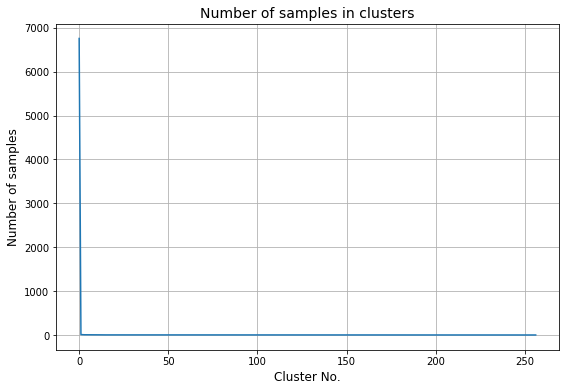

In [35]:
# get the distribution of samples in each cluster
x = [i for i in range(n_clusters_-1)]
y = [list(labels).count(i) for i in x]
plt.figure(figsize = (9,6))
plt.plot(x,y,)
plt.title('Number of samples in clusters',fontsize = 14)
plt.xlabel('Cluster No.',fontsize = 12)
plt.ylabel('Number of samples',fontsize = 12)
#plt.xticks(np.arange(0, n_clusters_, 1))
#for i in x:
#    plt.text(i-0.4,y[i]+100,str(y[i]),fontsize = 8)
plt.grid(True)
plt.show()
# 1 cluster with most samples ( around 6700 out of 7872), 775 outliers,
# many clusters with a few samples
# which is not reasonable

In [46]:
from sklearn.cluster import KMeans

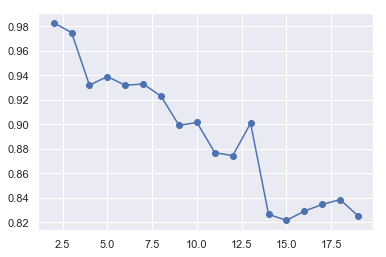

In [52]:
cluster_num = [ i for i in range(2,20)]
silhouette_scores = []
X_kmeans = df_drop_corr.values.copy()
for n_cluster in cluster_num:
    kmeans = KMeans(n_clusters=n_cluster,init='k-means++')
    kmeans.fit(X_kmeans)
    silhouette_scores.append( metrics.silhouette_score(X_kmeans, kmeans.labels_))
plt.plot(cluster_num,silhouette_scores,'o-')
plt.show()

# from the silhouette scores, there is no optimal number for clusters

In [54]:
# when putting number of clusters as 5, same situation with one main cluster having almost all the samples happened.
kmeans = KMeans(n_clusters=5,init='k-means++')
kmeans.fit(X_kmeans)
for i in range(5):
    print (i,'-',list(kmeans.labels_).count(i))

0 - 7732
1 - 4
2 - 44
3 - 6
4 - 86
